## Problem 1 : Less data to train

### Solution : Data Augmentation

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data labels from the csv file
data = pd.read_csv('./emergency_class_labels.csv')
data.head()
data.shape

(2352, 2)

In [3]:
# check class balance
data.emergency_or_not.value_counts()
data.emergency_or_not.value_counts()[1]/data.emergency_or_not.value_counts()[0]*100

72.81410727406319

In [4]:
# Select a test image for illustration

random_id = 777 #index of random image 

img_name = data['image_names'].iloc[random_id]
target = data['emergency_or_not'].iloc[random_id]

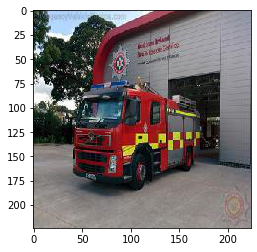

In [6]:
# Reading and plotting the random image

img = plt.imread('./images/' + img_name)

plt.imshow(img)
plt.show()

In [8]:
# Checking shape of the image

img.shape

(224, 224, 3)

In [9]:
# Import the ImageDataGenerator for Image Augmentation

from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


### Augmentations

1. rotation_range - Degree range for random rotations
2. width_shift_range - float or integer
3. height_shift_range - float or integer
4. horizontal_flip - Boolean

In [10]:
# Intializ the ImageDataGenerator object with the desired Augmentations

# 1. rotation_range

datagen = ImageDataGenerator(shear_range=0.5)

In [11]:
# Reshape the image to allow for iteration

img = img.reshape((1,)+img.shape)

In [12]:
#check the shape of the reshaped array

img.shape

(1, 224, 224, 3)

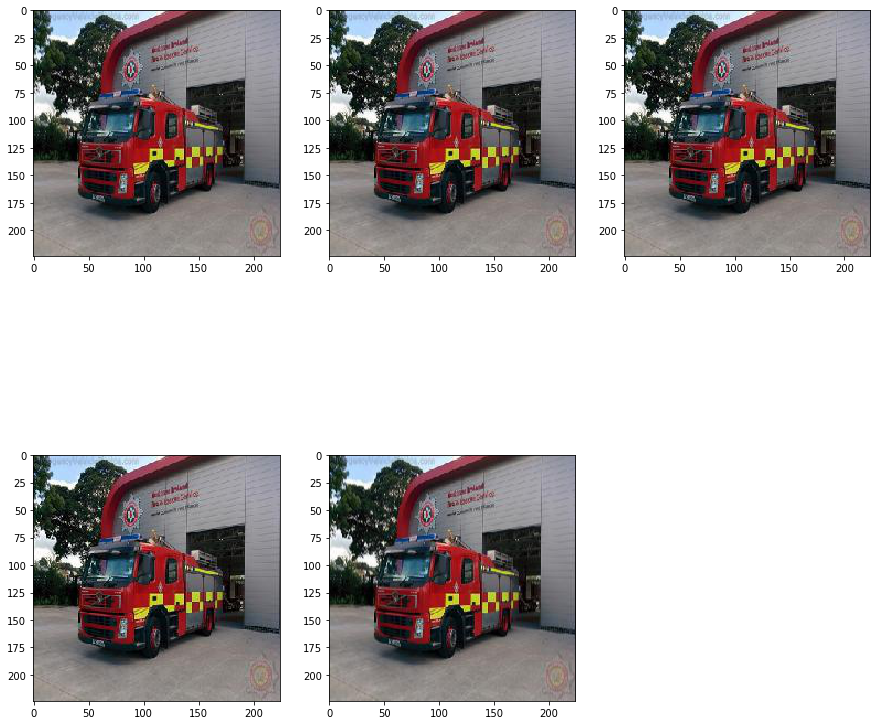

In [13]:
#Let's generate 5 randomly rotated images of our array.

f = plt.figure(figsize = (15,15))

count = 0
for x, y in datagen.flow(img,[target], batch_size=1):
    if count ==5:
        break
    
    count += 1
    f.add_subplot(230+count)
    plt.imshow(x.reshape(224,224,3).astype(int))
plt.show()

## Problem 2 - Variations in Data

In [14]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


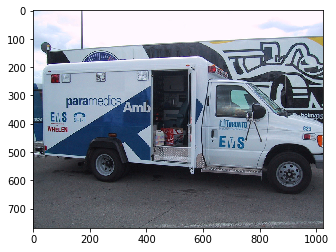

In [15]:
img = plt.imread('images/emergency_100.jpg')

plt.imshow(img)
plt.show()

In [16]:
img.shape

(768, 1024, 3)

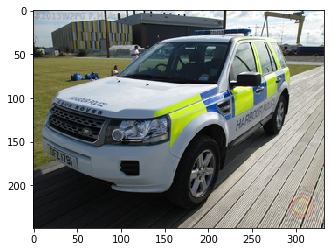

In [17]:
img = imread('images/emergency_1000.jpg')

pylab.imshow(img)
pylab.show()

In [18]:
img.shape

(249, 333, 3)

In [19]:
from keras.preprocessing import image

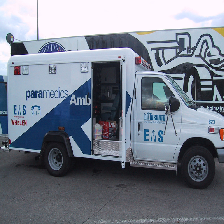

In [20]:
image.load_img('images/emergency_100.jpg', target_size=(224, 224))

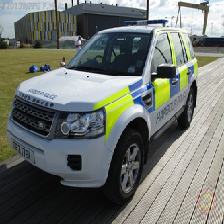

In [21]:
image.load_img('images/emergency_1000.jpg', target_size=(224, 224))

## Problem 3 - Overfitting

### Dropout

In [22]:
import pandas as pd

from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image

from sklearn.model_selection import train_test_split

In [23]:
data = pd.read_csv('../datasets/emergency_classification/emergency_classification.csv')

In [24]:
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [25]:
images = []
for img_loc in data.image_names:
    img = image.load_img('../datasets/emergency_classification/images/' + img_loc, target_size=(100, 100))
    img = image.img_to_array(img)
    images.append(img)
    
images=np.array(images)

In [26]:
train_x = images.reshape(2352, 100*100*3)

In [27]:
train_x /= train_x.max()
train_y = data.emergency_or_not.values

In [28]:
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.3, random_state=42)

In [29]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [30]:
history = model.fit(X_train, Y_train, epochs=500, batch_size=128,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/500
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6893 - acc: 0.5875 - val_loss: 0.6465 - val_acc: 0.6445
Epoch 2/500
1646/1646 [==============================] - 0s 154us/step - loss: 0.6458 - acc: 0.6361 - val_loss: 0.6509 - val_acc: 0.5949
Epoch 3/500
1646/1646 [==============================] - 0s 170us/step - loss: 0.6296 - acc: 0.6495 - val_loss: 0.6222 - val_acc: 0.6586
Epoch 4/500
1646/1646 [==============================] - 0s 181us/step - loss: 0.6204 - acc: 0.6665 - val_loss: 0.6050 - val_acc: 0.6827
Epoch 5/500
1646/1646 [==============================] - 0s 175us/step - loss: 0.6095 - acc: 0.6786 - val_loss: 0.5975 - val_acc: 0.6827
Epoch 6/500
1646/1646 [==============================] - 0s 158us/step - loss: 0.5936 - acc: 0.6993 - val_loss: 0.6065 - val_acc: 0.6686
Epoch 7/500
1646/1646 [==============================] - 0s 177us/step - loss: 0.6077 - acc: 0.6756 - val_loss: 0.5896 - val_acc: 0.6

1646/1646 [==============================] - 0s 144us/step - loss: 0.3575 - acc: 0.8603 - val_loss: 0.5323 - val_acc: 0.7224
Epoch 120/500
1646/1646 [==============================] - 0s 145us/step - loss: 0.4541 - acc: 0.7861 - val_loss: 0.7464 - val_acc: 0.6459
Epoch 121/500
1646/1646 [==============================] - 0s 138us/step - loss: 0.4069 - acc: 0.8177 - val_loss: 0.5354 - val_acc: 0.7224
Epoch 122/500
1646/1646 [==============================] - 0s 136us/step - loss: 0.3683 - acc: 0.8420 - val_loss: 0.5697 - val_acc: 0.7082
Epoch 123/500
1646/1646 [==============================] - 0s 156us/step - loss: 0.4778 - acc: 0.7515 - val_loss: 0.6999 - val_acc: 0.6572
Epoch 124/500
1646/1646 [==============================] - 0s 143us/step - loss: 0.4080 - acc: 0.8159 - val_loss: 0.5504 - val_acc: 0.7210
Epoch 125/500
1646/1646 [==============================] - 0s 142us/step - loss: 0.3717 - acc: 0.8457 - val_loss: 0.5808 - val_acc: 0.7082
Epoch 126/500
1646/1646 [================

1646/1646 [==============================] - 0s 147us/step - loss: 0.3983 - acc: 0.7977 - val_loss: 0.6132 - val_acc: 0.7082
Epoch 179/500
1646/1646 [==============================] - 0s 148us/step - loss: 0.2944 - acc: 0.8894 - val_loss: 0.5949 - val_acc: 0.7096
Epoch 180/500
1646/1646 [==============================] - 0s 146us/step - loss: 0.3650 - acc: 0.8317 - val_loss: 0.7878 - val_acc: 0.6530
Epoch 181/500
1646/1646 [==============================] - 0s 175us/step - loss: 0.4057 - acc: 0.7898 - val_loss: 0.5501 - val_acc: 0.7351
Epoch 182/500
1646/1646 [==============================] - 0s 161us/step - loss: 0.3281 - acc: 0.8670 - val_loss: 0.5715 - val_acc: 0.7195
Epoch 183/500
1646/1646 [==============================] - 0s 156us/step - loss: 0.2751 - acc: 0.9040 - val_loss: 0.5248 - val_acc: 0.7337
Epoch 184/500
1646/1646 [==============================] - 0s 180us/step - loss: 0.3109 - acc: 0.8748 - val_loss: 0.6517 - val_acc: 0.6898
Epoch 185/500
1646/1646 [================

1646/1646 [==============================] - 0s 166us/step - loss: 0.2964 - acc: 0.8767 - val_loss: 0.5583 - val_acc: 0.7394
Epoch 238/500
1646/1646 [==============================] - 0s 169us/step - loss: 0.3914 - acc: 0.8092 - val_loss: 0.6962 - val_acc: 0.6841
Epoch 239/500
1646/1646 [==============================] - 0s 164us/step - loss: 0.2651 - acc: 0.8967 - val_loss: 0.5419 - val_acc: 0.7493
Epoch 240/500
1646/1646 [==============================] - 0s 183us/step - loss: 0.2676 - acc: 0.8991 - val_loss: 0.6994 - val_acc: 0.6827
Epoch 241/500
1646/1646 [==============================] - 0s 167us/step - loss: 0.2173 - acc: 0.9356 - val_loss: 0.5352 - val_acc: 0.7479
Epoch 242/500
1646/1646 [==============================] - 0s 153us/step - loss: 0.2086 - acc: 0.9405 - val_loss: 0.6008 - val_acc: 0.7096
Epoch 243/500
1646/1646 [==============================] - 0s 154us/step - loss: 0.2542 - acc: 0.8979 - val_loss: 0.5443 - val_acc: 0.7450
Epoch 244/500
1646/1646 [================

1646/1646 [==============================] - 0s 143us/step - loss: 0.2979 - acc: 0.8578 - val_loss: 0.6601 - val_acc: 0.7139
Epoch 297/500
1646/1646 [==============================] - 0s 148us/step - loss: 0.1819 - acc: 0.9459 - val_loss: 0.5506 - val_acc: 0.7564
Epoch 298/500
1646/1646 [==============================] - 0s 146us/step - loss: 0.1814 - acc: 0.9508 - val_loss: 0.5515 - val_acc: 0.7535
Epoch 299/500
1646/1646 [==============================] - 0s 141us/step - loss: 0.1560 - acc: 0.9635 - val_loss: 0.5572 - val_acc: 0.7564
Epoch 300/500
1646/1646 [==============================] - 0s 162us/step - loss: 0.1633 - acc: 0.9599 - val_loss: 0.6203 - val_acc: 0.7068
Epoch 301/500
1646/1646 [==============================] - 0s 157us/step - loss: 0.4597 - acc: 0.8123 - val_loss: 0.5366 - val_acc: 0.7479
Epoch 302/500
1646/1646 [==============================] - 0s 151us/step - loss: 0.1684 - acc: 0.9581 - val_loss: 0.5449 - val_acc: 0.7507
Epoch 303/500
1646/1646 [================

1646/1646 [==============================] - 0s 152us/step - loss: 0.2178 - acc: 0.9119 - val_loss: 0.7231 - val_acc: 0.6728
Epoch 356/500
1646/1646 [==============================] - 0s 171us/step - loss: 0.4465 - acc: 0.8190 - val_loss: 0.6342 - val_acc: 0.7295
Epoch 357/500
1646/1646 [==============================] - 0s 145us/step - loss: 0.1232 - acc: 0.9757 - val_loss: 0.5964 - val_acc: 0.7493
Epoch 358/500
1646/1646 [==============================] - 0s 146us/step - loss: 0.1696 - acc: 0.9386 - val_loss: 0.9357 - val_acc: 0.6062
Epoch 359/500
1646/1646 [==============================] - 0s 146us/step - loss: 0.2208 - acc: 0.9113 - val_loss: 0.6254 - val_acc: 0.7408
Epoch 360/500
1646/1646 [==============================] - 0s 153us/step - loss: 0.1310 - acc: 0.9696 - val_loss: 0.6202 - val_acc: 0.7408
Epoch 361/500
1646/1646 [==============================] - 0s 165us/step - loss: 0.1346 - acc: 0.9666 - val_loss: 0.5812 - val_acc: 0.7550
Epoch 362/500
1646/1646 [================

1646/1646 [==============================] - 0s 154us/step - loss: 0.1176 - acc: 0.9702 - val_loss: 0.6566 - val_acc: 0.7408
Epoch 415/500
1646/1646 [==============================] - 0s 145us/step - loss: 0.1414 - acc: 0.9557 - val_loss: 0.9342 - val_acc: 0.6742
Epoch 416/500
1646/1646 [==============================] - 0s 146us/step - loss: 0.1195 - acc: 0.9714 - val_loss: 0.6612 - val_acc: 0.7422
Epoch 417/500
1646/1646 [==============================] - 0s 152us/step - loss: 0.0908 - acc: 0.9885 - val_loss: 0.5899 - val_acc: 0.7564
Epoch 418/500
1646/1646 [==============================] - 0s 156us/step - loss: 0.1003 - acc: 0.9885 - val_loss: 0.5982 - val_acc: 0.7578
Epoch 419/500
1646/1646 [==============================] - 0s 141us/step - loss: 0.0867 - acc: 0.9909 - val_loss: 0.5824 - val_acc: 0.7465
Epoch 420/500
1646/1646 [==============================] - 0s 142us/step - loss: 0.0875 - acc: 0.9921 - val_loss: 0.6045 - val_acc: 0.7535
Epoch 421/500
1646/1646 [================

1646/1646 [==============================] - 0s 143us/step - loss: 0.0688 - acc: 0.9964 - val_loss: 0.7230 - val_acc: 0.7295
Epoch 474/500
1646/1646 [==============================] - 0s 132us/step - loss: 0.0743 - acc: 0.9933 - val_loss: 0.6321 - val_acc: 0.7507
Epoch 475/500
1646/1646 [==============================] - 0s 132us/step - loss: 0.0661 - acc: 0.9964 - val_loss: 0.6053 - val_acc: 0.7465
Epoch 476/500
1646/1646 [==============================] - 0s 131us/step - loss: 0.0674 - acc: 0.9957 - val_loss: 0.6226 - val_acc: 0.7450
Epoch 477/500
1646/1646 [==============================] - 0s 128us/step - loss: 0.0662 - acc: 0.9957 - val_loss: 0.6026 - val_acc: 0.7450
Epoch 478/500
1646/1646 [==============================] - 0s 131us/step - loss: 0.1139 - acc: 0.9745 - val_loss: 0.6376 - val_acc: 0.7521
Epoch 479/500
1646/1646 [==============================] - 0s 130us/step - loss: 0.0683 - acc: 0.9970 - val_loss: 0.7024 - val_acc: 0.7394
Epoch 480/500
1646/1646 [================

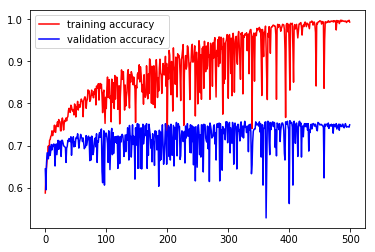

In [31]:
plt.plot(history.history['acc'], 'r')
plt.plot(history.history['val_acc'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

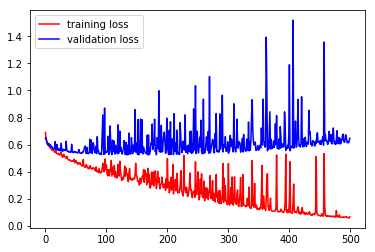

In [32]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'training loss': 'r', 'validation loss':'b'})
plt.show()

In [33]:
from keras.layers import Dropout

In [34]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
#model.add(Dropout(0.8))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [35]:
history = model.fit(X_train, Y_train, epochs=500, batch_size=128,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/500
1646/1646 [==============================] - 1s 305us/step - loss: 0.6777 - acc: 0.5863 - val_loss: 0.6823 - val_acc: 0.5609
Epoch 2/500
1646/1646 [==============================] - 0s 159us/step - loss: 0.6723 - acc: 0.5863 - val_loss: 0.6771 - val_acc: 0.5609
Epoch 3/500
1646/1646 [==============================] - 0s 145us/step - loss: 0.6682 - acc: 0.5863 - val_loss: 0.6707 - val_acc: 0.5609
Epoch 4/500
1646/1646 [==============================] - 0s 144us/step - loss: 0.6647 - acc: 0.5869 - val_loss: 0.6678 - val_acc: 0.5609
Epoch 5/500
1646/1646 [==============================] - 0s 160us/step - loss: 0.6607 - acc: 0.5911 - val_loss: 0.6641 - val_acc: 0.5637
Epoch 6/500
1646/1646 [==============================] - 0s 180us/step - loss: 0.6574 - acc: 0.5936 - val_loss: 0.6606 - val_acc: 0.5722
Epoch 7/500
1646/1646 [==============================] - 0s 166us/step - loss: 0.6542 - acc: 0.6039 - val_loss: 0.6573 - val_acc: 0

1646/1646 [==============================] - 0s 181us/step - loss: 0.5765 - acc: 0.7199 - val_loss: 0.5890 - val_acc: 0.6926
Epoch 61/500
1646/1646 [==============================] - 0s 157us/step - loss: 0.5750 - acc: 0.7260 - val_loss: 0.5871 - val_acc: 0.6926
Epoch 62/500
1646/1646 [==============================] - 0s 157us/step - loss: 0.5742 - acc: 0.7266 - val_loss: 0.5925 - val_acc: 0.6799
Epoch 63/500
1646/1646 [==============================] - 0s 158us/step - loss: 0.5733 - acc: 0.7266 - val_loss: 0.5899 - val_acc: 0.6870
Epoch 64/500
1646/1646 [==============================] - 0s 174us/step - loss: 0.5720 - acc: 0.7278 - val_loss: 0.5856 - val_acc: 0.6941
Epoch 65/500
1646/1646 [==============================] - 0s 156us/step - loss: 0.5715 - acc: 0.7278 - val_loss: 0.5853 - val_acc: 0.6955
Epoch 66/500
1646/1646 [==============================] - 0s 165us/step - loss: 0.5692 - acc: 0.7357 - val_loss: 0.5882 - val_acc: 0.6912
Epoch 67/500
1646/1646 [=======================

1646/1646 [==============================] - 0s 141us/step - loss: 0.4589 - acc: 0.8074 - val_loss: 0.5476 - val_acc: 0.7181
Epoch 179/500
1646/1646 [==============================] - 0s 136us/step - loss: 0.4561 - acc: 0.8056 - val_loss: 0.5516 - val_acc: 0.7068
Epoch 180/500
1646/1646 [==============================] - 0s 135us/step - loss: 0.4561 - acc: 0.8056 - val_loss: 0.5393 - val_acc: 0.7082
Epoch 181/500
1646/1646 [==============================] - 0s 126us/step - loss: 0.4562 - acc: 0.8026 - val_loss: 0.5427 - val_acc: 0.7224
Epoch 182/500
1646/1646 [==============================] - 0s 131us/step - loss: 0.4532 - acc: 0.8074 - val_loss: 0.5427 - val_acc: 0.7224
Epoch 183/500
1646/1646 [==============================] - 0s 121us/step - loss: 0.4524 - acc: 0.8068 - val_loss: 0.5451 - val_acc: 0.7181
Epoch 184/500
1646/1646 [==============================] - 0s 158us/step - loss: 0.4511 - acc: 0.8038 - val_loss: 0.5417 - val_acc: 0.7195
Epoch 185/500
1646/1646 [================

1646/1646 [==============================] - 0s 144us/step - loss: 0.3890 - acc: 0.8609 - val_loss: 0.5454 - val_acc: 0.7153
Epoch 238/500
1646/1646 [==============================] - 0s 152us/step - loss: 0.3899 - acc: 0.8548 - val_loss: 0.5299 - val_acc: 0.7351
Epoch 239/500
1646/1646 [==============================] - 0s 144us/step - loss: 0.3875 - acc: 0.8542 - val_loss: 0.5346 - val_acc: 0.7195
Epoch 240/500
1646/1646 [==============================] - 0s 164us/step - loss: 0.3824 - acc: 0.8566 - val_loss: 0.5378 - val_acc: 0.7195
Epoch 241/500
1646/1646 [==============================] - 0s 142us/step - loss: 0.3823 - acc: 0.8615 - val_loss: 0.5466 - val_acc: 0.7096
Epoch 242/500
1646/1646 [==============================] - 0s 139us/step - loss: 0.3800 - acc: 0.8627 - val_loss: 0.5281 - val_acc: 0.7394
Epoch 243/500
1646/1646 [==============================] - 0s 153us/step - loss: 0.3795 - acc: 0.8651 - val_loss: 0.5467 - val_acc: 0.7110
Epoch 244/500
1646/1646 [================

1646/1646 [==============================] - 0s 152us/step - loss: 0.3361 - acc: 0.8718 - val_loss: 0.5362 - val_acc: 0.7422
Epoch 297/500
1646/1646 [==============================] - 0s 136us/step - loss: 0.3102 - acc: 0.9040 - val_loss: 0.5243 - val_acc: 0.7323
Epoch 298/500
1646/1646 [==============================] - 0s 145us/step - loss: 0.3251 - acc: 0.8767 - val_loss: 0.5365 - val_acc: 0.7309
Epoch 299/500
1646/1646 [==============================] - 0s 151us/step - loss: 0.3074 - acc: 0.9028 - val_loss: 0.5581 - val_acc: 0.7153
Epoch 300/500
1646/1646 [==============================] - 0s 144us/step - loss: 0.3205 - acc: 0.8900 - val_loss: 0.5931 - val_acc: 0.7054
Epoch 301/500
1646/1646 [==============================] - 0s 153us/step - loss: 0.3492 - acc: 0.8633 - val_loss: 0.5450 - val_acc: 0.7210
Epoch 302/500
1646/1646 [==============================] - 0s 152us/step - loss: 0.3005 - acc: 0.9028 - val_loss: 0.5317 - val_acc: 0.7408
Epoch 303/500
1646/1646 [================

1646/1646 [==============================] - 0s 128us/step - loss: 0.2450 - acc: 0.9277 - val_loss: 0.6348 - val_acc: 0.7025
Epoch 356/500
1646/1646 [==============================] - 0s 141us/step - loss: 0.3576 - acc: 0.8372 - val_loss: 0.6288 - val_acc: 0.6941
Epoch 357/500
1646/1646 [==============================] - 0s 134us/step - loss: 0.4473 - acc: 0.7801 - val_loss: 0.6329 - val_acc: 0.7054
Epoch 358/500
1646/1646 [==============================] - 0s 138us/step - loss: 0.2333 - acc: 0.9338 - val_loss: 0.5345 - val_acc: 0.7450
Epoch 359/500
1646/1646 [==============================] - 0s 134us/step - loss: 0.2315 - acc: 0.9307 - val_loss: 0.5328 - val_acc: 0.7479
Epoch 360/500
1646/1646 [==============================] - 0s 137us/step - loss: 0.2669 - acc: 0.9034 - val_loss: 0.5559 - val_acc: 0.7493
Epoch 361/500
1646/1646 [==============================] - 0s 131us/step - loss: 0.2746 - acc: 0.8931 - val_loss: 0.6610 - val_acc: 0.6884
Epoch 362/500
1646/1646 [================

1646/1646 [==============================] - 0s 142us/step - loss: 0.4574 - acc: 0.7685 - val_loss: 0.6094 - val_acc: 0.7082
Epoch 415/500
1646/1646 [==============================] - 0s 133us/step - loss: 0.3142 - acc: 0.8578 - val_loss: 0.6311 - val_acc: 0.7167
Epoch 416/500
1646/1646 [==============================] - 0s 139us/step - loss: 0.2970 - acc: 0.8712 - val_loss: 0.6705 - val_acc: 0.7011
Epoch 417/500
1646/1646 [==============================] - 0s 121us/step - loss: 0.1927 - acc: 0.9435 - val_loss: 0.5450 - val_acc: 0.7479
Epoch 418/500
1646/1646 [==============================] - 0s 125us/step - loss: 0.2645 - acc: 0.8931 - val_loss: 0.6794 - val_acc: 0.6997
Epoch 419/500
1646/1646 [==============================] - 0s 122us/step - loss: 0.2156 - acc: 0.9247 - val_loss: 0.5530 - val_acc: 0.7479
Epoch 420/500
1646/1646 [==============================] - 0s 145us/step - loss: 0.1776 - acc: 0.9581 - val_loss: 0.5583 - val_acc: 0.7422
Epoch 421/500
1646/1646 [================

1646/1646 [==============================] - 0s 129us/step - loss: 0.1473 - acc: 0.9642 - val_loss: 0.6250 - val_acc: 0.7337
Epoch 474/500
1646/1646 [==============================] - 0s 139us/step - loss: 0.3590 - acc: 0.8196 - val_loss: 0.6254 - val_acc: 0.7040
Epoch 475/500
1646/1646 [==============================] - 0s 143us/step - loss: 0.1582 - acc: 0.9496 - val_loss: 0.5874 - val_acc: 0.7450
Epoch 476/500
1646/1646 [==============================] - 0s 173us/step - loss: 0.1392 - acc: 0.9654 - val_loss: 0.6868 - val_acc: 0.7125
Epoch 477/500
1646/1646 [==============================] - 0s 139us/step - loss: 0.4727 - acc: 0.7600 - val_loss: 0.6125 - val_acc: 0.7068
Epoch 478/500
1646/1646 [==============================] - 0s 160us/step - loss: 0.1567 - acc: 0.9599 - val_loss: 0.5675 - val_acc: 0.7465
Epoch 479/500
1646/1646 [==============================] - 0s 143us/step - loss: 0.3364 - acc: 0.8433 - val_loss: 0.6423 - val_acc: 0.7011
Epoch 480/500
1646/1646 [================

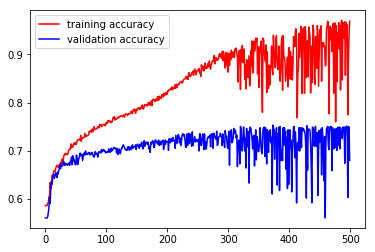

In [36]:
plt.plot(history.history['acc'], 'r')
plt.plot(history.history['val_acc'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

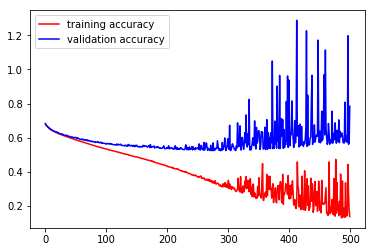

In [37]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

In [38]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [39]:
history = model.fit(X_train, Y_train, epochs=500, batch_size=128,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/500
1646/1646 [==============================] - 1s 310us/step - loss: 0.6887 - acc: 0.5389 - val_loss: 0.6830 - val_acc: 0.5609
Epoch 2/500
1646/1646 [==============================] - 0s 133us/step - loss: 0.6773 - acc: 0.5838 - val_loss: 0.6814 - val_acc: 0.5609
Epoch 3/500
1646/1646 [==============================] - 0s 133us/step - loss: 0.6732 - acc: 0.5863 - val_loss: 0.6775 - val_acc: 0.5609
Epoch 4/500
1646/1646 [==============================] - 0s 140us/step - loss: 0.6701 - acc: 0.5844 - val_loss: 0.6740 - val_acc: 0.5609
Epoch 5/500
1646/1646 [==============================] - 0s 124us/step - loss: 0.6663 - acc: 0.5905 - val_loss: 0.6705 - val_acc: 0.5609
Epoch 6/500
1646/1646 [==============================] - 0s 128us/step - loss: 0.6664 - acc: 0.5930 - val_loss: 0.6676 - val_acc: 0.5623
Epoch 7/500
1646/1646 [==============================] - 0s 136us/step - loss: 0.6622 - acc: 0.6069 - val_loss: 0.6654 - val_acc: 0

1646/1646 [==============================] - 0s 182us/step - loss: 0.5996 - acc: 0.6883 - val_loss: 0.6002 - val_acc: 0.6799
Epoch 61/500
1646/1646 [==============================] - 0s 150us/step - loss: 0.6013 - acc: 0.6926 - val_loss: 0.6006 - val_acc: 0.6785
Epoch 62/500
1646/1646 [==============================] - 0s 165us/step - loss: 0.5939 - acc: 0.6974 - val_loss: 0.5988 - val_acc: 0.6827
Epoch 63/500
1646/1646 [==============================] - 0s 150us/step - loss: 0.5972 - acc: 0.6950 - val_loss: 0.5998 - val_acc: 0.6827
Epoch 64/500
1646/1646 [==============================] - 0s 152us/step - loss: 0.5953 - acc: 0.6962 - val_loss: 0.5982 - val_acc: 0.6856
Epoch 65/500
1646/1646 [==============================] - 0s 136us/step - loss: 0.5916 - acc: 0.7066 - val_loss: 0.5983 - val_acc: 0.6827
Epoch 66/500
1646/1646 [==============================] - 0s 141us/step - loss: 0.5933 - acc: 0.7060 - val_loss: 0.5972 - val_acc: 0.6841
Epoch 67/500
1646/1646 [=======================

1646/1646 [==============================] - 0s 130us/step - loss: 0.5107 - acc: 0.7752 - val_loss: 0.5591 - val_acc: 0.7040
Epoch 179/500
1646/1646 [==============================] - 0s 123us/step - loss: 0.5125 - acc: 0.7685 - val_loss: 0.5501 - val_acc: 0.7068
Epoch 180/500
1646/1646 [==============================] - 0s 131us/step - loss: 0.5127 - acc: 0.7728 - val_loss: 0.5577 - val_acc: 0.7054
Epoch 181/500
1646/1646 [==============================] - 0s 123us/step - loss: 0.5038 - acc: 0.7734 - val_loss: 0.5509 - val_acc: 0.7068
Epoch 182/500
1646/1646 [==============================] - 0s 125us/step - loss: 0.5003 - acc: 0.7825 - val_loss: 0.5637 - val_acc: 0.6997
Epoch 183/500
1646/1646 [==============================] - 0s 122us/step - loss: 0.5064 - acc: 0.7716 - val_loss: 0.5557 - val_acc: 0.7110
Epoch 184/500
1646/1646 [==============================] - 0s 154us/step - loss: 0.5067 - acc: 0.7679 - val_loss: 0.5529 - val_acc: 0.7082
Epoch 185/500
1646/1646 [================

1646/1646 [==============================] - 0s 125us/step - loss: 0.4686 - acc: 0.7965 - val_loss: 0.5399 - val_acc: 0.7167
Epoch 238/500
1646/1646 [==============================] - 0s 130us/step - loss: 0.4615 - acc: 0.8026 - val_loss: 0.5405 - val_acc: 0.7167
Epoch 239/500
1646/1646 [==============================] - 0s 124us/step - loss: 0.4660 - acc: 0.7910 - val_loss: 0.5450 - val_acc: 0.7153
Epoch 240/500
1646/1646 [==============================] - 0s 128us/step - loss: 0.4711 - acc: 0.7868 - val_loss: 0.5444 - val_acc: 0.7167
Epoch 241/500
1646/1646 [==============================] - 0s 136us/step - loss: 0.4640 - acc: 0.8044 - val_loss: 0.5568 - val_acc: 0.7054
Epoch 242/500
1646/1646 [==============================] - 0s 151us/step - loss: 0.4630 - acc: 0.8007 - val_loss: 0.5407 - val_acc: 0.7181
Epoch 243/500
1646/1646 [==============================] - 0s 130us/step - loss: 0.4645 - acc: 0.7855 - val_loss: 0.5411 - val_acc: 0.7167
Epoch 244/500
1646/1646 [================

1646/1646 [==============================] - 0s 142us/step - loss: 0.4199 - acc: 0.8183 - val_loss: 0.5319 - val_acc: 0.7252
Epoch 297/500
1646/1646 [==============================] - 0s 124us/step - loss: 0.4234 - acc: 0.8244 - val_loss: 0.5315 - val_acc: 0.7266
Epoch 298/500
1646/1646 [==============================] - 0s 130us/step - loss: 0.4206 - acc: 0.8275 - val_loss: 0.5312 - val_acc: 0.7266
Epoch 299/500
1646/1646 [==============================] - 0s 124us/step - loss: 0.4176 - acc: 0.8190 - val_loss: 0.5365 - val_acc: 0.7295
Epoch 300/500
1646/1646 [==============================] - 0s 149us/step - loss: 0.4242 - acc: 0.8305 - val_loss: 0.5312 - val_acc: 0.7280
Epoch 301/500
1646/1646 [==============================] - 0s 134us/step - loss: 0.4215 - acc: 0.8220 - val_loss: 0.5412 - val_acc: 0.7125
Epoch 302/500
1646/1646 [==============================] - 0s 150us/step - loss: 0.4180 - acc: 0.8287 - val_loss: 0.5354 - val_acc: 0.7295
Epoch 303/500
1646/1646 [================

1646/1646 [==============================] - 0s 143us/step - loss: 0.3775 - acc: 0.8493 - val_loss: 0.5282 - val_acc: 0.7337
Epoch 356/500
1646/1646 [==============================] - 0s 137us/step - loss: 0.3760 - acc: 0.8536 - val_loss: 0.5324 - val_acc: 0.7238
Epoch 357/500
1646/1646 [==============================] - 0s 131us/step - loss: 0.3671 - acc: 0.8548 - val_loss: 0.5798 - val_acc: 0.7068
Epoch 358/500
1646/1646 [==============================] - 0s 139us/step - loss: 0.3657 - acc: 0.8548 - val_loss: 0.5384 - val_acc: 0.7181
Epoch 359/500
1646/1646 [==============================] - 0s 137us/step - loss: 0.3674 - acc: 0.8512 - val_loss: 0.5325 - val_acc: 0.7280
Epoch 360/500
1646/1646 [==============================] - 0s 138us/step - loss: 0.3687 - acc: 0.8591 - val_loss: 0.5274 - val_acc: 0.7380
Epoch 361/500
1646/1646 [==============================] - 0s 158us/step - loss: 0.3655 - acc: 0.8578 - val_loss: 0.5280 - val_acc: 0.7295
Epoch 362/500
1646/1646 [================

1646/1646 [==============================] - 0s 154us/step - loss: 0.3162 - acc: 0.8906 - val_loss: 0.5821 - val_acc: 0.7167
Epoch 415/500
1646/1646 [==============================] - 0s 159us/step - loss: 0.3366 - acc: 0.8615 - val_loss: 0.5403 - val_acc: 0.7252
Epoch 416/500
1646/1646 [==============================] - 0s 159us/step - loss: 0.3119 - acc: 0.8870 - val_loss: 0.5744 - val_acc: 0.7125
Epoch 417/500
1646/1646 [==============================] - 0s 151us/step - loss: 0.3264 - acc: 0.8815 - val_loss: 0.5286 - val_acc: 0.7436
Epoch 418/500
1646/1646 [==============================] - 0s 145us/step - loss: 0.3282 - acc: 0.8736 - val_loss: 0.5257 - val_acc: 0.7422
Epoch 419/500
1646/1646 [==============================] - 0s 161us/step - loss: 0.3258 - acc: 0.8603 - val_loss: 0.5341 - val_acc: 0.7266
Epoch 420/500
1646/1646 [==============================] - 0s 177us/step - loss: 0.3212 - acc: 0.8742 - val_loss: 0.5643 - val_acc: 0.7238
Epoch 421/500
1646/1646 [================

1646/1646 [==============================] - 0s 134us/step - loss: 0.2601 - acc: 0.9125 - val_loss: 0.5316 - val_acc: 0.7465
Epoch 474/500
1646/1646 [==============================] - 0s 135us/step - loss: 0.2699 - acc: 0.9022 - val_loss: 0.5419 - val_acc: 0.7351
Epoch 475/500
1646/1646 [==============================] - 0s 122us/step - loss: 0.2716 - acc: 0.9046 - val_loss: 0.5955 - val_acc: 0.7224
Epoch 476/500
1646/1646 [==============================] - 0s 128us/step - loss: 0.2779 - acc: 0.9064 - val_loss: 0.6111 - val_acc: 0.7181
Epoch 477/500
1646/1646 [==============================] - 0s 120us/step - loss: 0.2629 - acc: 0.9156 - val_loss: 0.5466 - val_acc: 0.7323
Epoch 478/500
1646/1646 [==============================] - 0s 133us/step - loss: 0.2604 - acc: 0.9113 - val_loss: 0.5494 - val_acc: 0.7295
Epoch 479/500
1646/1646 [==============================] - 0s 145us/step - loss: 0.2586 - acc: 0.9046 - val_loss: 0.5377 - val_acc: 0.7380
Epoch 480/500
1646/1646 [================

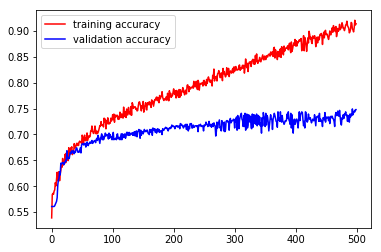

In [40]:
plt.plot(history.history['acc'], 'r')
plt.plot(history.history['val_acc'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

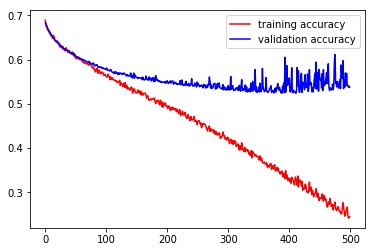

In [41]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

In [42]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [43]:
history = model.fit(X_train, Y_train, epochs=500, batch_size=128,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/500
1646/1646 [==============================] - 0s 269us/step - loss: 0.7087 - acc: 0.5498 - val_loss: 0.6817 - val_acc: 0.5609
Epoch 2/500
1646/1646 [==============================] - 0s 103us/step - loss: 0.6990 - acc: 0.5583 - val_loss: 0.6747 - val_acc: 0.5609
Epoch 3/500
1646/1646 [==============================] - 0s 109us/step - loss: 0.6938 - acc: 0.5541 - val_loss: 0.6704 - val_acc: 0.5609
Epoch 4/500
1646/1646 [==============================] - 0s 120us/step - loss: 0.6903 - acc: 0.5632 - val_loss: 0.6668 - val_acc: 0.5623
Epoch 5/500
1646/1646 [==============================] - 0s 114us/step - loss: 0.6869 - acc: 0.5869 - val_loss: 0.6638 - val_acc: 0.5637
Epoch 6/500
1646/1646 [==============================] - 0s 114us/step - loss: 0.6913 - acc: 0.5571 - val_loss: 0.6599 - val_acc: 0.5751
Epoch 7/500
1646/1646 [==============================] - 0s 109us/step - loss: 0.6890 - acc: 0.5808 - val_loss: 0.6565 - val_acc: 0

1646/1646 [==============================] - 0s 112us/step - loss: 0.5589 - acc: 0.7084 - val_loss: 0.5740 - val_acc: 0.7040
Epoch 120/500
1646/1646 [==============================] - 0s 122us/step - loss: 0.5679 - acc: 0.7108 - val_loss: 0.5687 - val_acc: 0.7011
Epoch 121/500
1646/1646 [==============================] - 0s 107us/step - loss: 0.5750 - acc: 0.7230 - val_loss: 0.5730 - val_acc: 0.6997
Epoch 122/500
1646/1646 [==============================] - 0s 110us/step - loss: 0.5565 - acc: 0.7236 - val_loss: 0.5692 - val_acc: 0.7011
Epoch 123/500
1646/1646 [==============================] - 0s 107us/step - loss: 0.5663 - acc: 0.7193 - val_loss: 0.5680 - val_acc: 0.7040
Epoch 124/500
1646/1646 [==============================] - 0s 105us/step - loss: 0.5637 - acc: 0.7120 - val_loss: 0.5679 - val_acc: 0.7025
Epoch 125/500
1646/1646 [==============================] - 0s 105us/step - loss: 0.5614 - acc: 0.7303 - val_loss: 0.5673 - val_acc: 0.7054
Epoch 126/500
1646/1646 [================

1646/1646 [==============================] - 0s 109us/step - loss: 0.5233 - acc: 0.7546 - val_loss: 0.5566 - val_acc: 0.7096
Epoch 179/500
1646/1646 [==============================] - 0s 115us/step - loss: 0.5285 - acc: 0.7491 - val_loss: 0.5597 - val_acc: 0.7025
Epoch 180/500
1646/1646 [==============================] - 0s 108us/step - loss: 0.5238 - acc: 0.7515 - val_loss: 0.5612 - val_acc: 0.6997
Epoch 181/500
1646/1646 [==============================] - 0s 101us/step - loss: 0.5247 - acc: 0.7533 - val_loss: 0.5584 - val_acc: 0.7110
Epoch 182/500
1646/1646 [==============================] - 0s 105us/step - loss: 0.5342 - acc: 0.7424 - val_loss: 0.5523 - val_acc: 0.7125
Epoch 183/500
1646/1646 [==============================] - 0s 99us/step - loss: 0.5250 - acc: 0.7515 - val_loss: 0.5574 - val_acc: 0.7125
Epoch 184/500
1646/1646 [==============================] - 0s 108us/step - loss: 0.5123 - acc: 0.7691 - val_loss: 0.5614 - val_acc: 0.6997
Epoch 185/500
1646/1646 [=================

1646/1646 [==============================] - 0s 102us/step - loss: 0.4845 - acc: 0.7795 - val_loss: 0.5454 - val_acc: 0.7181
Epoch 238/500
1646/1646 [==============================] - 0s 110us/step - loss: 0.5012 - acc: 0.7710 - val_loss: 0.5493 - val_acc: 0.7167
Epoch 239/500
1646/1646 [==============================] - 0s 112us/step - loss: 0.4918 - acc: 0.7710 - val_loss: 0.5488 - val_acc: 0.7167
Epoch 240/500
1646/1646 [==============================] - 0s 120us/step - loss: 0.4948 - acc: 0.7704 - val_loss: 0.5527 - val_acc: 0.7139
Epoch 241/500
1646/1646 [==============================] - 0s 109us/step - loss: 0.4840 - acc: 0.7801 - val_loss: 0.5413 - val_acc: 0.7125
Epoch 242/500
1646/1646 [==============================] - 0s 125us/step - loss: 0.4836 - acc: 0.7807 - val_loss: 0.5413 - val_acc: 0.7110
Epoch 243/500
1646/1646 [==============================] - 0s 109us/step - loss: 0.4943 - acc: 0.7813 - val_loss: 0.5473 - val_acc: 0.7195
Epoch 244/500
1646/1646 [================

1646/1646 [==============================] - 0s 110us/step - loss: 0.4439 - acc: 0.8007 - val_loss: 0.5374 - val_acc: 0.7210
Epoch 297/500
1646/1646 [==============================] - 0s 112us/step - loss: 0.4409 - acc: 0.8123 - val_loss: 0.5408 - val_acc: 0.7195
Epoch 298/500
1646/1646 [==============================] - 0s 126us/step - loss: 0.4503 - acc: 0.8026 - val_loss: 0.5353 - val_acc: 0.7252
Epoch 299/500
1646/1646 [==============================] - 0s 115us/step - loss: 0.4549 - acc: 0.8074 - val_loss: 0.5470 - val_acc: 0.7125
Epoch 300/500
1646/1646 [==============================] - 0s 115us/step - loss: 0.4570 - acc: 0.8013 - val_loss: 0.5465 - val_acc: 0.7125
Epoch 301/500
1646/1646 [==============================] - 0s 107us/step - loss: 0.4439 - acc: 0.8044 - val_loss: 0.5341 - val_acc: 0.7295
Epoch 302/500
1646/1646 [==============================] - 0s 112us/step - loss: 0.4443 - acc: 0.8141 - val_loss: 0.5479 - val_acc: 0.7167
Epoch 303/500
1646/1646 [================

1646/1646 [==============================] - 0s 107us/step - loss: 0.3546 - acc: 0.8609 - val_loss: 0.5657 - val_acc: 0.7252
Epoch 415/500
1646/1646 [==============================] - 0s 110us/step - loss: 0.3451 - acc: 0.8718 - val_loss: 0.5372 - val_acc: 0.7252
Epoch 416/500
1646/1646 [==============================] - 0s 113us/step - loss: 0.3480 - acc: 0.8676 - val_loss: 0.5285 - val_acc: 0.7394
Epoch 417/500
1646/1646 [==============================] - 0s 110us/step - loss: 0.3415 - acc: 0.8706 - val_loss: 0.5474 - val_acc: 0.7337
Epoch 418/500
1646/1646 [==============================] - 0s 115us/step - loss: 0.3540 - acc: 0.8518 - val_loss: 0.5518 - val_acc: 0.7323
Epoch 419/500
1646/1646 [==============================] - 0s 106us/step - loss: 0.3497 - acc: 0.8597 - val_loss: 0.5399 - val_acc: 0.7309
Epoch 420/500
1646/1646 [==============================] - 0s 109us/step - loss: 0.3485 - acc: 0.8572 - val_loss: 0.5349 - val_acc: 0.7309
Epoch 421/500
1646/1646 [================

1646/1646 [==============================] - 0s 115us/step - loss: 0.2903 - acc: 0.8882 - val_loss: 0.5544 - val_acc: 0.7323
Epoch 474/500
1646/1646 [==============================] - 0s 114us/step - loss: 0.2914 - acc: 0.8985 - val_loss: 0.5363 - val_acc: 0.7394
Epoch 475/500
1646/1646 [==============================] - 0s 107us/step - loss: 0.3023 - acc: 0.8821 - val_loss: 0.5365 - val_acc: 0.7408
Epoch 476/500
1646/1646 [==============================] - 0s 109us/step - loss: 0.2948 - acc: 0.8858 - val_loss: 0.5358 - val_acc: 0.7436
Epoch 477/500
1646/1646 [==============================] - 0s 105us/step - loss: 0.3020 - acc: 0.8785 - val_loss: 0.5364 - val_acc: 0.7436
Epoch 478/500
1646/1646 [==============================] - 0s 112us/step - loss: 0.2884 - acc: 0.8876 - val_loss: 0.5379 - val_acc: 0.7408
Epoch 479/500
1646/1646 [==============================] - 0s 115us/step - loss: 0.2825 - acc: 0.8979 - val_loss: 0.5369 - val_acc: 0.7422
Epoch 480/500
1646/1646 [================

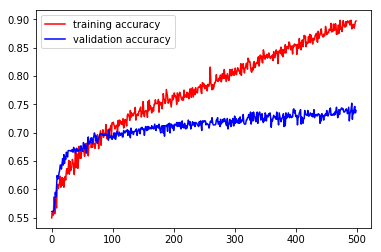

In [44]:
plt.plot(history.history['acc'], 'r')
plt.plot(history.history['val_acc'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

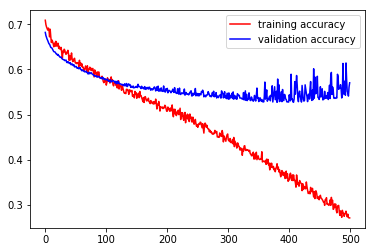

In [45]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

### Early Stopping

In [46]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [47]:
from keras.callbacks import EarlyStopping

In [48]:
estop = EarlyStopping(monitor='val_acc', patience=10)

In [49]:
history = model.fit(X_train, Y_train, epochs=1000, batch_size=512,validation_data=(X_valid,Y_valid), callbacks=[estop])

Train on 1646 samples, validate on 706 samples
Epoch 1/1000
1646/1646 [==============================] - 1s 319us/step - loss: 0.6789 - acc: 0.5881 - val_loss: 0.7002 - val_acc: 0.5609
Epoch 2/1000
1646/1646 [==============================] - 0s 154us/step - loss: 0.6844 - acc: 0.5656 - val_loss: 0.7468 - val_acc: 0.5609
Epoch 3/1000
1646/1646 [==============================] - 0s 124us/step - loss: 0.6815 - acc: 0.5996 - val_loss: 0.6474 - val_acc: 0.6686
Epoch 4/1000
1646/1646 [==============================] - 0s 122us/step - loss: 0.6468 - acc: 0.6355 - val_loss: 0.6842 - val_acc: 0.5623
Epoch 5/1000
1646/1646 [==============================] - 0s 123us/step - loss: 0.6563 - acc: 0.6015 - val_loss: 0.6305 - val_acc: 0.6728
Epoch 6/1000
1646/1646 [==============================] - 0s 121us/step - loss: 0.6324 - acc: 0.6549 - val_loss: 0.7339 - val_acc: 0.5609
Epoch 7/1000
1646/1646 [==============================] - 0s 122us/step - loss: 0.6509 - acc: 0.6379 - val_loss: 0.6546 - val

## Problem 5 - Large amount of training time

### BatchNormalization

In [50]:
from keras.layers import BatchNormalization

In [51]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [52]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=512,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/50
1646/1646 [==============================] - 1s 441us/step - loss: 0.9020 - acc: 0.5650 - val_loss: 2.7402 - val_acc: 0.4433
Epoch 2/50
1646/1646 [==============================] - 0s 147us/step - loss: 0.7187 - acc: 0.6488 - val_loss: 3.9089 - val_acc: 0.4391
Epoch 3/50
1646/1646 [==============================] - 0s 166us/step - loss: 0.6517 - acc: 0.6993 - val_loss: 0.8667 - val_acc: 0.6147
Epoch 4/50
1646/1646 [==============================] - 0s 158us/step - loss: 0.5331 - acc: 0.7394 - val_loss: 0.6367 - val_acc: 0.7025
Epoch 5/50
1646/1646 [==============================] - 0s 172us/step - loss: 0.4845 - acc: 0.7813 - val_loss: 0.6347 - val_acc: 0.6530
Epoch 6/50
1646/1646 [==============================] - 0s 140us/step - loss: 0.4701 - acc: 0.7947 - val_loss: 0.6227 - val_acc: 0.6870
Epoch 7/50
1646/1646 [==============================] - 0s 168us/step - loss: 0.4429 - acc: 0.8092 - val_loss: 2.4531 - val_acc: 0.4603
E